# Simple linear regression

## Predict price of pizza based on size

The sklearn.linear_model.LinearRegression class is an estimator. Estimators predict a value based on the observed data. In scikit-learn, all estimators implement the fit() and predict() methods. The former method is used to learn the parameters of a model, and the latter method is used to predict the value of a response variable
for an explanatory variable using the learned parameters. It is easy to experiment
with different models using scikit-learn because all estimators implement the fit and predict methods.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X = [[6], [8], [10], [14],   [18]]
Y = [[7], [9], [13], [17.5], [18]]

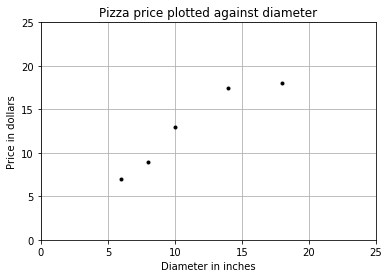

In [4]:
plt.figure()
plt.title("Pizza price plotted against diameter")
plt.xlabel("Diameter in inches")
plt.ylabel("Price in dollars")
plt.plot(X,Y,"k.")
plt.axis([0,25,0,25])
plt.grid(True)
plt.show()

In [23]:
#Make simple linear regression
from sklearn.linear_model import LinearRegression

#Create and fit the model
model = LinearRegression()
model.fit(X,Y)

#Make preidiction
print('A 12" pizza should cost: %0.2f' %(model.predict([12])[0]))

A 12" pizza should cost: 13.68


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


## Evaluate fitness of model using cost (lost) function


Cost function for simple linear regression is the sum total of residuals, called RSS

In [29]:
import numpy as np

print("Residual sum of squares: %.2f" %np.mean((model.predict(X)-Y)**2))

Residual sum of squares: 1.75


## Solving OLS for simple regression

Goal is to calculate vector of coefficients beta that minimizes cost function. 


In [51]:
from __future__ import division

xbar = np.mean(X)
ybar = np.mean(Y)
print("Mean of X is:", xbar)
print("Mean of Y is:", ybar)

Mean of X is: 11.2
Mean of Y is: 12.9


In [55]:
#Make own function for variance and covariance to better understand how it works
def variance(X):
    return np.sum((X - np.mean(X))**2 / (len(X)-1))

def covariance(X,Y):
    return np.sum((X - np.mean(X)) * (Y - np.mean(Y)) / (len(X)-1))

In [56]:
print("Variance of X: ", variance(X))
print("Covariance of X, Y is: ", covariance(X,Y))

Variance of X:  23.2
Covariance of X, Y is:  22.65


In [57]:
#For simple linear regression, beta is cov/var. 
#Following calculation of beta, I can also get alpha a = y - bx

beta = covariance(X,Y) / variance(X)
beta

0.9762931034482758

### Evaluate fit using r square

In [70]:
#Load another set
X_test = np.array([8,9,11,16,12])
Y_test = np.array([11,8.5,15,18,11])

In [92]:
model.fit(X_test.reshape(-1,1),Y_test)
model.predict(X_test.reshape(-1,1))

array([  9.54123711,  10.52835052,  12.50257732,  17.43814433,  13.48969072])

In [96]:
def total_sum_squares(Y):
    return np.sum((Y_test - np.mean(Y_test))**2)

In [97]:
#Residual sum of squares
def residual_sum_squares(Y):
    return np.sum( (Y_test - model.predict(X_test.reshape(-1,1)))**2)

In [98]:
#Get R square

1 - residual_sum_squares(Y_test)/total_sum_squares(Y_test)

0.66560639610861039

In [100]:
#From sklearn
model.score(X_test.reshape(-1,1),Y_test)

0.6656063961086105

## Multiple linear regression

Add topings to our model of pizza price prediction

In [101]:
from numpy.linalg import inv
from numpy import dot, transpose

In [103]:
X = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]
X

[[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]

In [104]:
y = [[7], [9], [13], [17.5], [18]]

In [107]:
#Solve using linear algebra
dot(inv(dot(transpose(X),X)), dot(transpose(X),y))

array([[ 1.1875    ],
       [ 1.01041667],
       [ 0.39583333]])

In [109]:
#Solve using numpy least squares procedure
from numpy.linalg import lstsq
lstsq(X,y)[0]

array([[ 1.1875    ],
       [ 1.01041667],
       [ 0.39583333]])

In [112]:
#Compare simple vs multinomial
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
Y = [[7],    [9],    [13],    [17.5],  [18]]

In [114]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
Y_test = [[11],   [8.5],  [15],    [18],    [11]]

In [118]:
predictions = model.predict(X_test)

for i, prediction in enumerate(predictions):
    print("Predicted: %s, Target: %s" %(prediction, Y_test[i]))

Predicted: [ 10.0625], Target: [11]
Predicted: [ 10.28125], Target: [8.5]
Predicted: [ 13.09375], Target: [15]
Predicted: [ 18.14583333], Target: [18]
Predicted: [ 13.3125], Target: [11]


In [119]:
print("R square:", model.score(X_test, Y_test))

R square: 0.770167773132


## Polynomial regression

Use PolynomialFeatures to transform the data

In [120]:
from sklearn.preprocessing import PolynomialFeatures

In [122]:
X_train = [[6], [8], [10], [14],   [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6],  [8],   [11], [16]]
y_test = [[8], [12], [15], [18]]

In [123]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [125]:
xx = np.linspace(0, 26, 100)
xx

array([  0.        ,   0.26262626,   0.52525253,   0.78787879,
         1.05050505,   1.31313131,   1.57575758,   1.83838384,
         2.1010101 ,   2.36363636,   2.62626263,   2.88888889,
         3.15151515,   3.41414141,   3.67676768,   3.93939394,
         4.2020202 ,   4.46464646,   4.72727273,   4.98989899,
         5.25252525,   5.51515152,   5.77777778,   6.04040404,
         6.3030303 ,   6.56565657,   6.82828283,   7.09090909,
         7.35353535,   7.61616162,   7.87878788,   8.14141414,
         8.4040404 ,   8.66666667,   8.92929293,   9.19191919,
         9.45454545,   9.71717172,   9.97979798,  10.24242424,
        10.50505051,  10.76767677,  11.03030303,  11.29292929,
        11.55555556,  11.81818182,  12.08080808,  12.34343434,
        12.60606061,  12.86868687,  13.13131313,  13.39393939,
        13.65656566,  13.91919192,  14.18181818,  14.44444444,
        14.70707071,  14.96969697,  15.23232323,  15.49494949,
        15.75757576,  16.02020202,  16.28282828,  16.54

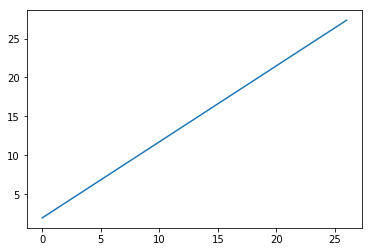

In [127]:
yy = regressor.predict(xx.reshape(xx.shape[0],1))
plt.plot(xx,yy)

In [129]:
quadratic_featureziser = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featureziser.fit_transform(X_train)
X_train_quadratic

array([[   1.,    6.,   36.],
       [   1.,    8.,   64.],
       [   1.,   10.,  100.],
       [   1.,   14.,  196.],
       [   1.,   18.,  324.]])

In [130]:
X_test_quadratic = quadratic_featureziser.transform(X_test)

In [131]:
regressor_quadratic = LinearRegression()

In [132]:
regressor_quadratic.fit(X_train_quadratic,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [133]:
xx_quadratic = quadratic_featureziser.transform(xx.reshape(xx.shape[0],1))

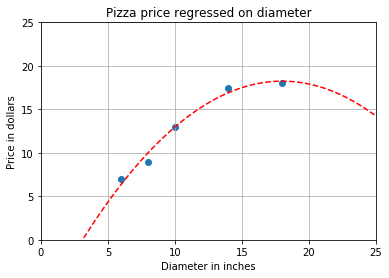

In [136]:
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r',linestyle = '--')
plt.title("Pizza price regressed on diameter")
plt.xlabel("Diameter in inches")
plt.ylabel("Price in dollars")
plt.axis([0,25,0,25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()

# Apply linear regression on Wine dataset from UCI

In [139]:
import pandas as pd

In [155]:
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")
df = pd.read_csv(target_url,header=0, sep=";")

In [156]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [157]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


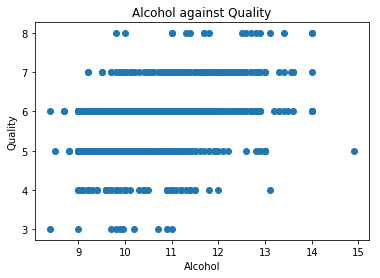

In [158]:
plt.scatter(df['alcohol'], df['quality'])
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.title("Alcohol against Quality")
plt.show()

## Fit and evaluate the model

In [159]:

from sklearn.cross_validation import train_test_split

In [160]:
#Split into feature and target, train and test
X = df[list(df.columns)[:-1]]
y = df['quality']

In [162]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [163]:
y.tail()

1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, dtype: int64

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [169]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)

In [170]:
#Check R squared
print("R squared is: ", regressor.score(X_test, y_test))

R squared is:  0.30726198487


## Cross validation

In [171]:
#Make cross validation
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(regressor, X, y, cv = 5)

In [172]:
print(scores.mean(), scores)

0.290041628842 [ 0.13200871  0.31858135  0.34955348  0.369145    0.2809196 ]


## Fitting using gradient descent

In [193]:
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

data = load_boston()

In [194]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [195]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and wil

In [196]:
regressor = SGDRegressor(loss='squared_loss')

In [197]:
scores = cross_val_score(regressor, X_train, y_train, cv=5)
print('Cross validation r-squared scores:', scores)
print('Average cross validation r-squared score:', np.mean(scores))
regressor.fit_transform(X_train, y_train)
print('Test set r-squared score', regressor.score(X_test, y_test))

Cross validation r-squared scores: [ 0.82610369  0.73023677  0.72314011  0.57012925  0.63665398]
Average cross validation r-squared score: 0.697252759707
Test set r-squared score 0.702989500158


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
